In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
exup_df1=pd.read_excel("E:/gene_original data/extreme_upreg_IA&B.xlsx")
exup_df2=pd.read_excel("E:/gene_original data/extreme_upreg_IIB.xlsx")
exup_df3=pd.read_excel("E:/gene_original data/extreme_upreg_IIIB.xlsx")
exup_df4=pd.read_excel("E:/gene_original data/extreme_upreg_IVA.xlsx")
exdown_df1=pd.read_excel("E:/gene_original data/extreme_downreg_IA&B.xlsx")
exdown_df2=pd.read_excel("E:/gene_original data/extreme_downreg_IIB.xlsx")
exdown_df3=pd.read_excel("E:/gene_original data/extreme_downreg_IIIB.xlsx")
exdown_df4=pd.read_excel("E:/gene_original data/extreme_downreg_IVA.xlsx")

In [3]:
stage1_df=pd.concat([exup_df1,exdown_df1])
stage2_df=pd.concat([exup_df2,exdown_df2])
stage3_df=pd.concat([exup_df3,exdown_df3])
stage4_df=pd.concat([exup_df4,exdown_df4])

In [4]:
stage1_df['Stage']=1
stage2_df['Stage']=2
stage3_df['Stage']=3
stage4_df['Stage']=4

In [5]:
all_df=pd.concat([stage1_df,stage2_df,stage3_df,stage4_df])

C:\Users\umarsheaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 373 to 2988
Data columns (total 14 columns):
ANOVA p-value (CC- I A & B vs. Control)           24 non-null float64
ANOVA p-value (II B vs. Control)                  36 non-null float64
ANOVA p-value (III A & B vs. Control)             50 non-null float64
ANOVA p-value (IV A vs. Control)                  98 non-null float64
Fold Change (linear) (CC- I A & B vs. Control)    24 non-null float64
Fold Change (linear) (II B vs. Control)           36 non-null float64
Fold Change (linear) (III A & B vs. Control)      50 non-null float64
Fold Change (linear) (IV A vs. Control)           98 non-null float64
Gene Symbol                                       207 non-null object
Stage                                             208 non-null int64
abs_log2                                          208 non-null float64
color                                             208 non-null object
log2_FC                                           77

In [7]:
all_df['Stage']=all_df['Stage'].astype('category')

In [8]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 373 to 2988
Data columns (total 14 columns):
ANOVA p-value (CC- I A & B vs. Control)           24 non-null float64
ANOVA p-value (II B vs. Control)                  36 non-null float64
ANOVA p-value (III A & B vs. Control)             50 non-null float64
ANOVA p-value (IV A vs. Control)                  98 non-null float64
Fold Change (linear) (CC- I A & B vs. Control)    24 non-null float64
Fold Change (linear) (II B vs. Control)           36 non-null float64
Fold Change (linear) (III A & B vs. Control)      50 non-null float64
Fold Change (linear) (IV A vs. Control)           98 non-null float64
Gene Symbol                                       207 non-null object
Stage                                             208 non-null category
abs_log2                                          208 non-null float64
color                                             208 non-null object
log2_FC                                          

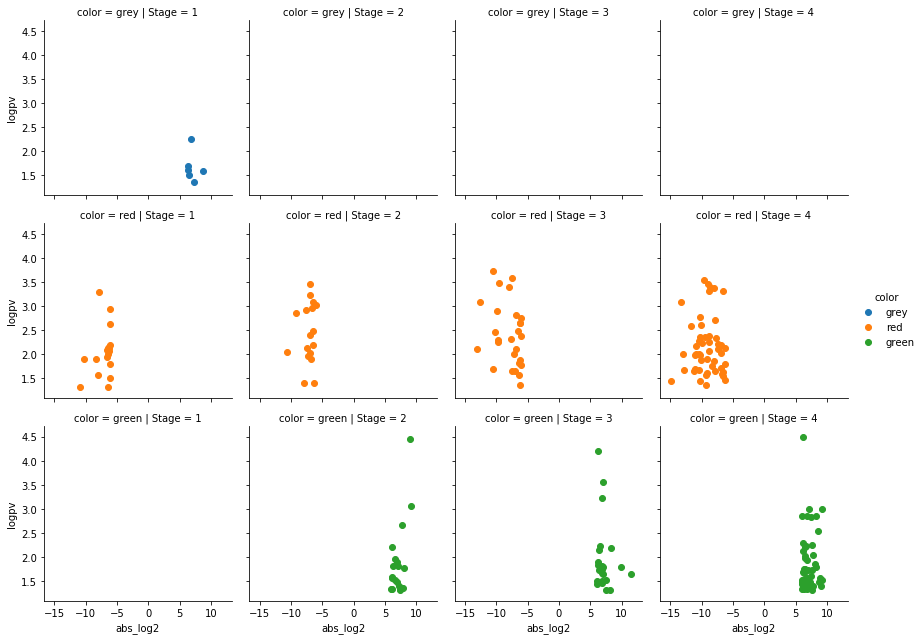

In [9]:
# create the FacetGrid instance
p = sns.FacetGrid(all_df, col="Stage", row='color',hue='color')
# choose the graph to display in each subplot
p.map(plt.scatter, 'abs_log2', 'logpv')
p.add_legend();

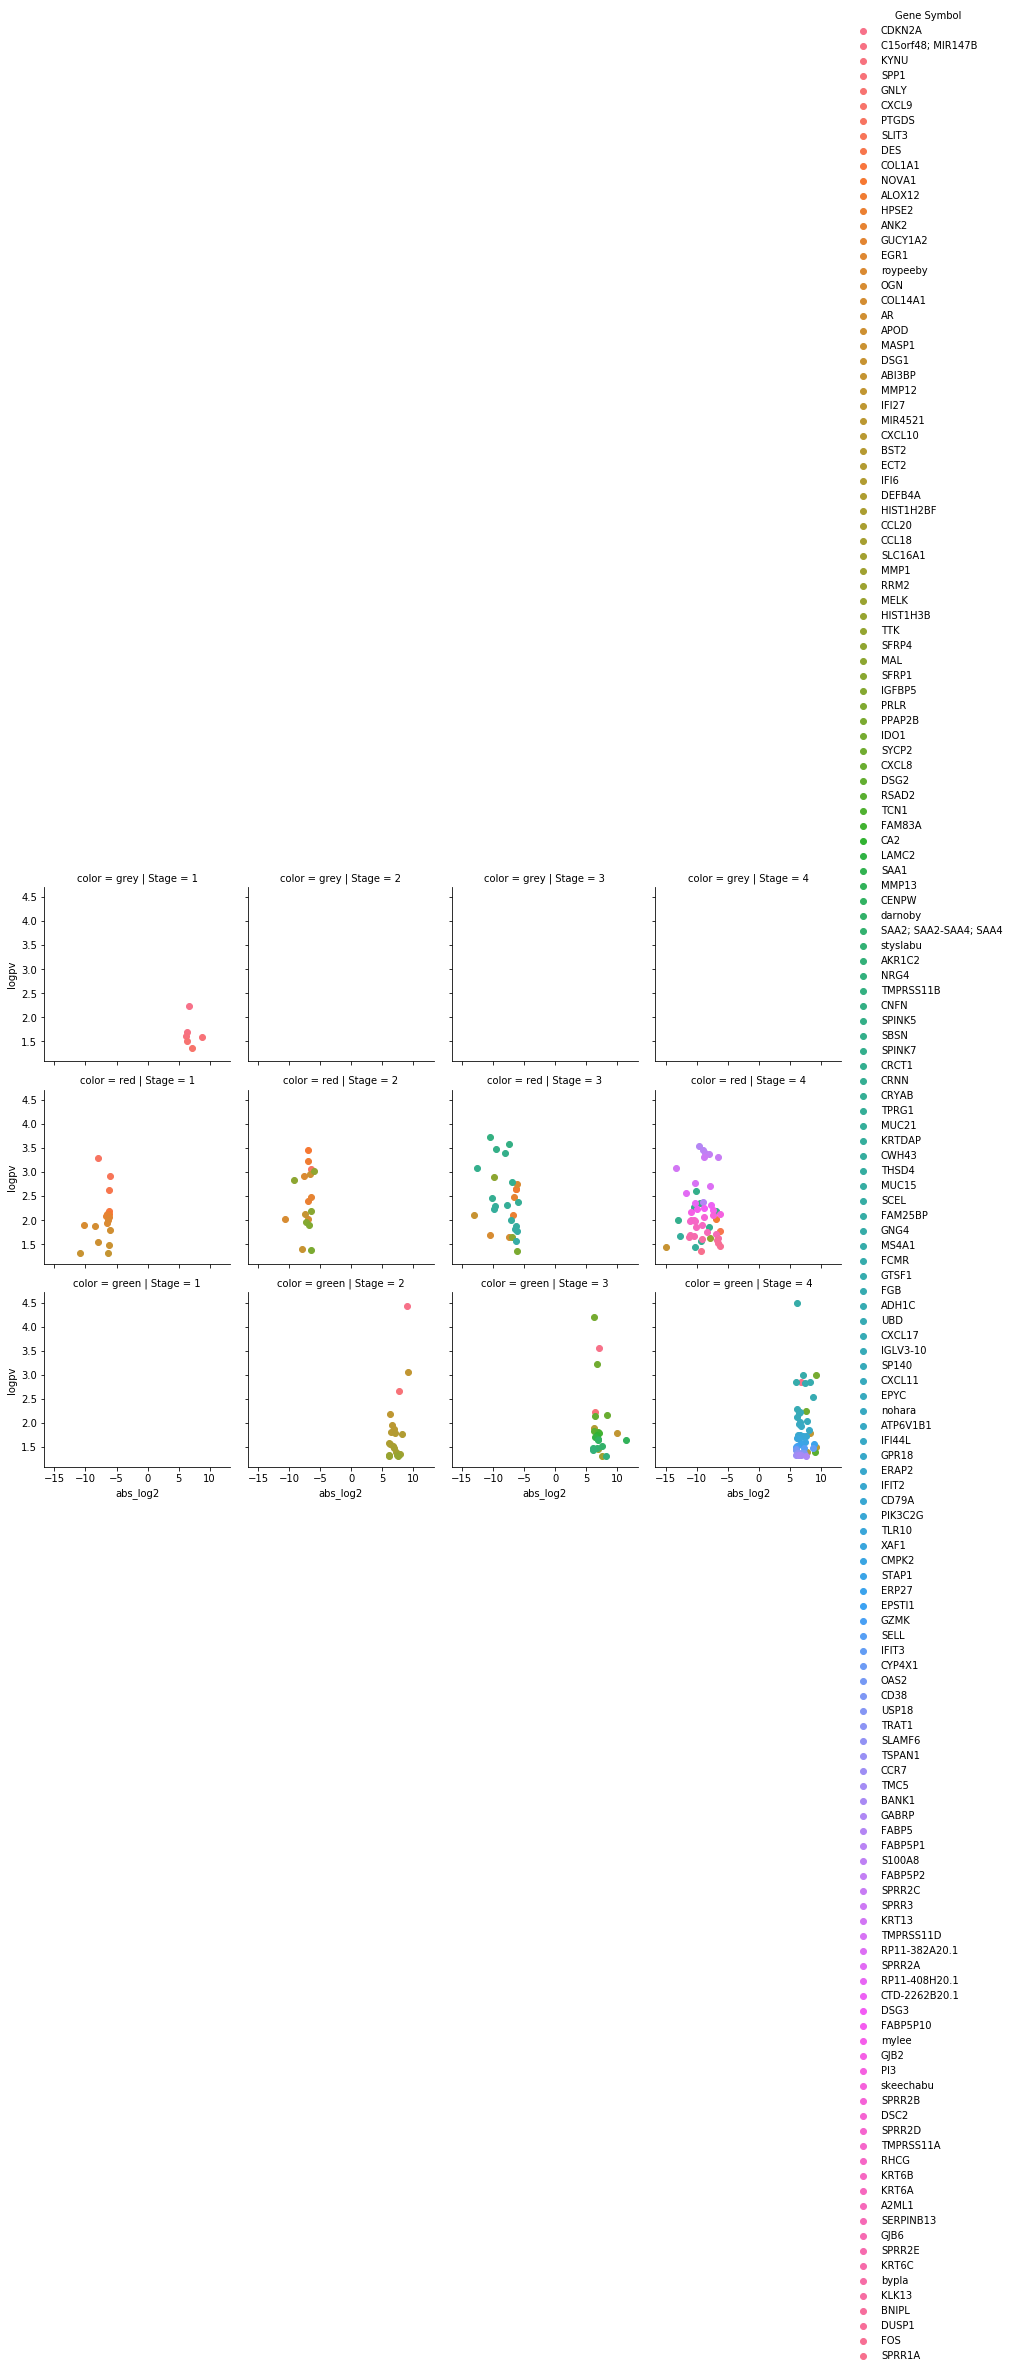

In [10]:
# create the FacetGrid instance
p = sns.FacetGrid(all_df, col="Stage", row='color',hue='Gene Symbol')
# choose the graph to display in each subplot
p.map(plt.scatter, 'abs_log2', 'logpv')
p.add_legend();

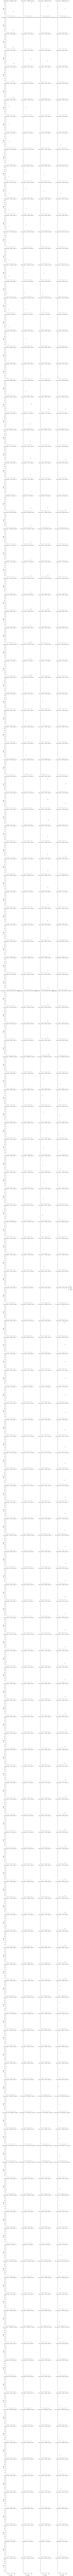

In [11]:
# create the FacetGrid instance
p = sns.FacetGrid(all_df, col="Stage", row='Gene Symbol',hue='color')
# choose the graph to display in each subplot
p.map(plt.scatter, 'abs_log2', 'logpv')
p.add_legend();

In [12]:
import plotly

In [13]:
import plotly.graph_objs as go

In [78]:
#data = [go.Histogram(
        #x = all_df.abs_log2,
        #xbins = {'start': 1, 'size': 0.1, 'end' :5}
#)]

#plotly.offline.iplot(data, filename='overall_distribution')

In [17]:
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html

In [18]:
import flask
import pandas as pd
import time
import os

In [20]:
#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/hello-world-stock.csv')

In [79]:
#df[df['Stock']=='TSLA']

In [73]:
#server = flask.Flask('app')

In [74]:
#server.secret_key = os.environ.get('secret_key', 'secret')

In [75]:
#app = dash.Dash()


In [76]:
#from dash_table_component import Table
from dash_table_experiments import DataTable

In [77]:
app.layout = html.Div([
    html.H1('VOLCONO PLOT'),
    

    dcc.Graph(
    id='graph',
    figure={
        'data':  [
            go.Scatter(
                x=all_df.abs_log2,
                y=all_df.logpv,
                text=all_df['Gene Symbol'],
                type='scatter',
                mode='markers')
        ]
        }
),
    DataTable(all_df)

])
if __name__ == '__main__':
    app.run_server()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
[2019-02-08 04:13:53,905] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\umarsheaik\Anaconda3\lib\site-packages\flask\app.py", line 2292, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\umarsheaik\Anaconda3\lib\site-packages\flask\app.py", line 1808, in full_dispatch_request
    self.try_trigger_before_first_request_functions()
  File "C:\Users\umarsheaik\Anaconda3\lib\site-packages\flask\app.py", line 1855, in try_trigger_before_first_request_functions
    func()
  File "C:\Users\umarsheaik\Anaconda3\lib\site-packages\dash\dash.py", line 995, in _setup_server
    self._validate_layout()
  File "C:\Users\umarsheaik\Anaconda3\lib\site-packages\dash\dash.py", line 983, in _validate_layout
    for component in to_validate.traverse():
  File "C:\Users\umarsheaik\Anaconda3\lib\site-packages\dash\development\base_component.py", line 218, in traverse
    for t in self.t

In [72]:
app.layout

Div([H1('VOLCONO PLOT'), Graph(id='graph', figure={'data': [{'type': 'scatter', 'x': 373      6.738903
1178     6.318859
1432     6.266224
1485     8.764241
1728     6.412782
2334     7.224870
41      -7.921365
92      -6.083852
170     -6.177918
414     -6.190220
470     -6.218394
475     -6.339316
480     -6.492654
518     -6.691115
552     -6.240505
629     -6.394034
719     -6.566663
769    -10.214003
791     -8.441409
947     -6.103498
1599    -7.996502
1805    -6.150763
2534   -10.847582
2585    -6.393519
2        9.019229
67       9.113456
186      7.676874
544      6.185867
897      6.608366
1060     6.840841
          ...    
595    -10.875112
652     -6.324631
678     -7.436378
733     -8.798504
805     -6.891541
830    -10.382710
831    -12.941902
832    -10.895181
859    -11.055750
864    -10.203984
1022    -9.202222
1074   -10.085778
1099    -8.034029
1297    -6.204767
1409    -8.408245
1515    -6.879338
1599   -11.031880
1610   -10.366825
1651   -12.743522
1695   -11.1718

In [93]:
server = flask.Flask('app')
server.secret_key = os.environ.get('secret_key', 'secret')


app = dash.Dash('app', server=server)

app.scripts.config.serve_locally = False
dcc._js_dist[0]['external_url'] = 'https://cdn.plot.ly/plotly-basic-latest.min.js'

app.layout = html.Div([
    html.H1('volcono'),
    dcc.Dropdown(
        id='my-dropdown',
        options=[
            {'label': 'Stage1', 'value': '1'},
            {'label': 'Stage2', 'value': '2'},
            {'label': 'Stage3', 'value': '3'}
        ],
        value='2'
    ),
    dcc.Graph(id='my-graph')
], className="container")

@app.callback(Output('my-graph', 'figure'),
              [Input('my-dropdown', 'value')])

def update_graph(selected_dropdown_value):
    dff = all_df[all_df['Stage'] == selected_dropdown_value]
    return {
        'data':  [
            go.Scatter(
                x=all_df.abs_log2,
                y=all_df.logpv,
                text=all_df['Gene Symbol'],
                type='scatter',
                mode='markers')
        ],
        
    }

if __name__ == '__main__':
    app.run_server()

 * Serving Flask app "app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [08/Feb/2019 04:52:24] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Feb/2019 04:52:24] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [08/Feb/2019 04:52:24] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [08/Feb/2019 04:52:24] "POST /_dash-update-component HTTP/1.1" 200 -
